<a href="https://colab.research.google.com/github/linalex13666/Labs/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
def create_holes(dataframe, column_name, hole_percentage = 60):


    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes

In [ ]:

dfh = create_holes(df, 'age')
dfh

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,NaN,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18.0,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,NaN,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
#Удаление
dfh_cleaned = dfh.dropna()


dfh_cleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
8,GP,M,15.0,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
10,GP,F,15.0,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,2,14,14,14
13,GP,M,15.0,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,0,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,MS,M,19.0,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,5,8,0
642,MS,F,17.0,U,GT3,T,4,3,teacher,other,...,5,5,4,1,1,1,0,6,9,11
645,MS,F,18.0,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9


Ничего не удалено. Пропущенных значений нет.

In [ ]:
#Заполнение при помощи медианы
dfh_filled_median = dfh.fillna(dfh.median())

dfh_filled_median

<ipython-input-50-14bcdda2ed65>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfh_filled_median = dfh.fillna(dfh.median())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,17.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,17.0,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18.0,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
#Заполнение при помощи среднего
df.age = df.age.astype("int")
dfh_filled_mean = dfh.fillna(dfh.mean())

dfh_filled_mean

<ipython-input-52-4b586935469a>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfh_filled_mean = dfh.fillna(dfh.mean())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16.696154,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,16.696154,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.000000,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.000000,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.696154,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,16.696154,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18.000000,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18.000000,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,16.696154,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
#Заполнение при помощи моды

In [ ]:
#Заполнение при помощи интерполяции
dfh_interpolated = dfh.interpolate()

dfh_interpolated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.000000,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.000000,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,15.000000,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,17.666667,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18.000000,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18.000000,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,18.000000,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [11]:
#Методом среднего
mean = df["age"].mean()
std_deviation = df["age"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["age"] if abs(x - mean) > threshold]
outliers

[22, 21, 21]

In [13]:
#При помощи межквартильного размаха
Q1 =  df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df["age"] > (Q1-1.5*IQR )) & (df["age"] < (Q3+1.5*IQR))]



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc181a70be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc181a70f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc181a70940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc181a714b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc181a71750>],
 'means': []}

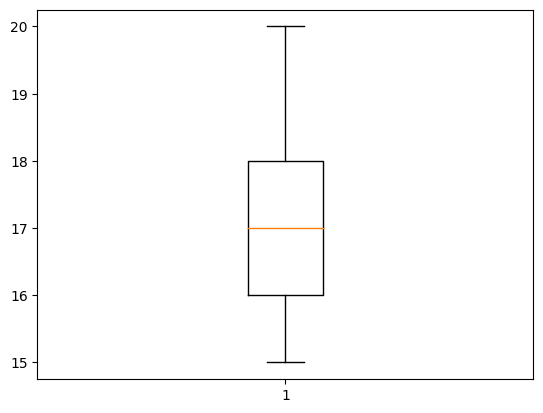

In [24]:
#Статистика и объяснение
plt.boxplot(df["age"])

**Объяснения**
На первом боксплоте видны выбросы. После выявления выбросов, они были удалены. Второй боксплот построен на основе набора данных из которого удалены выбросы.

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.0000,750.000000,750.000000,750.000000,750.000000
mean,16.581333,2.592000,2.349333,1.534667,1.952000,0.201333,3.937333,3.189333,3.149333,1.494667,2.258667,3.5480,3.533333,11.492000,11.653333,11.981333
std,1.227488,1.136335,1.100112,0.734973,0.836638,0.576114,0.950058,1.041921,1.165409,0.924000,1.281385,1.4523,4.502583,2.698329,2.796113,3.095658
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.0000,0.000000,10.000000,10.000000,10.000000
50%,16.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.0000,2.000000,11.000000,12.000000,12.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.0000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,32.000000,19.000000,19.000000,19.000000


In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,6,9,11,11
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,0,13,12,12
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,4,12,13,13
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,2,12,13,13


In [ ]:
#Проверка на дубли
duplicate_rows = df[df.duplicated()]
duplicate_rows

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,6,9,11,11
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,0,13,12,12
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,4,12,13,13
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,2,12,13,13


In [ ]:

#Удаление дублей
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
num_features = df.select_dtypes(include=['int64']).columns
df_minmax_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])

df_minmax_scaled


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,...,0.75,0.50,0.75,0.00,0.00,0.50,0.1250,0.000000,0.578947,0.578947
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,...,1.00,0.50,0.50,0.00,0.00,0.50,0.0625,0.473684,0.578947,0.578947
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,...,0.75,0.50,0.25,0.25,0.50,0.50,0.1875,0.631579,0.684211,0.631579
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,...,0.50,0.25,0.25,0.00,0.00,1.00,0.0000,0.736842,0.736842,0.736842
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,...,0.75,0.50,0.25,0.00,0.25,1.00,0.0000,0.578947,0.684211,0.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,0.571429,R,GT3,T,0.50,0.75,services,other,...,1.00,0.75,0.25,0.00,0.25,1.00,0.1250,0.526316,0.578947,0.526316
645,MS,F,0.428571,U,LE3,T,0.75,0.25,teacher,services,...,0.75,0.50,0.75,0.00,0.00,0.00,0.1250,0.789474,0.789474,0.842105
646,MS,F,0.428571,U,GT3,T,0.25,0.25,other,other,...,0.00,0.00,0.00,0.00,0.00,1.00,0.1875,0.578947,0.631579,0.473684
647,MS,M,0.285714,U,LE3,T,0.75,0.25,services,services,...,0.25,0.75,1.00,0.50,0.75,0.25,0.1875,0.526316,0.526316,0.526316


In [6]:
standard_scaler = StandardScaler()
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled.age.unique()

array([ 1.03169516,  0.21013668, -1.43298028, -0.6114218 ,  1.85325364,
        4.31792908,  2.67481212,  3.4963706 ])

Масштабируйте категориальные признаки через OneHotEncoder

In [8]:
df.school = df.school.astype("category")
df.sex = df.sex.astype("category")
df.age = df.age.astype("int")
df.address = df.address.astype("category")
df.famsize = df.famsize.astype("category")
df.Pstatus = df.Pstatus.astype("category")
df.Medu = df.Medu.astype("category")
df.Fedu = df.Fedu.astype("category")
df.Mjob = df.Mjob.astype("category")
df.Fjob = df.Fjob.astype("category")
df.reason = df.reason.astype("category")
df.guardian = df.guardian.astype("category")
df.traveltime = df.traveltime.astype("category")
df.studytime = df.studytime.astype("category")
df.failures = df.failures.astype("category")
df.schoolsup = df.schoolsup.astype("category")
df.famsup = df.famsup.astype("category")
df.paid = df.paid.astype("category")
df.activities = df.activities.astype("category")
df.nursery = df.nursery.astype("category")
df.higher = df.higher.astype("category")
df.internet = df.internet.astype("category")
df.romantic = df.romantic.astype("category")
df.famrel = df.famrel.astype("category")
df.freetime = df.freetime.astype("category")
df.goout = df.goout.astype("category")
df.Dalc = df.Dalc.astype("category")
df.Walc = df.Walc.astype("category")
df.health = df.health.astype("category")
df.absences = df.absences.astype("category")
df.G1 = df.G1.astype("int")
df.G2 = df.G2.astype("int")
df.G3 = df.G3.astype("int")


In [9]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
cat_features = df.select_dtypes(include=['category']).columns
encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])


encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'traveltime_2',
       'traveltime_3', 'traveltime_4', 'studytime_2', 'studytime_3',
       'studytime_4', 'failures_1', 'failures_2', 'failures_3',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes',
       'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5', 'freetime_2',
       'freetime_3', 'freetime_4', 'freetime_5', 'goout_2', 'goout_3',
       'goout_4', 'goout_5', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5',
       'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5', 'health_2', 'health_3',
       'health_4', 'health_5', 'absen

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])